In [1]:
# Import libraries i will need
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from osgeo import gdal
import random as python_random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import gc
import keras

#import the libraries necessary for confusion plot
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Model
from matplotlib import colors


In [2]:
# Grab the paths to all of the images in the 20m buffer folder
inputPath="../data/processed/cam-2017-20m" # 5495 files
filelist = []

# Load the images, and append them to a list.
for filepath in os.listdir(inputPath):
    if filepath.endswith((".tif")):
    #print(filepath)
        tempfile=inputPath+'/{0}'.format(filepath)
        filelist.append(tempfile)

In [6]:
len(filelist) # 5495 files

5495

In [28]:
# Create a list with all of the images as arrays
images = []

# Generate data
for i, ID in enumerate(filelist):
    # Store sample
    dataset = gdal.Open(ID)
    image = dataset.ReadAsArray()  # Returned image is a NumPy array with shape (16, 60, 60) for example.
    images.append(image)  # Append the NumPy array to the list.

In [30]:
# Make images into on big array and then transpose for use in ML model
all_data= np.stack(images, axis= 0)
all_data = np.transpose(all_data, axes=[0, 2, 3, 1])
# normalize values of the input data to 0,1
all_data = all_data/255

In [31]:
all_data.shape

(5495, 160, 160, 3)

In [32]:
all_data[1].shape

(160, 160, 3)

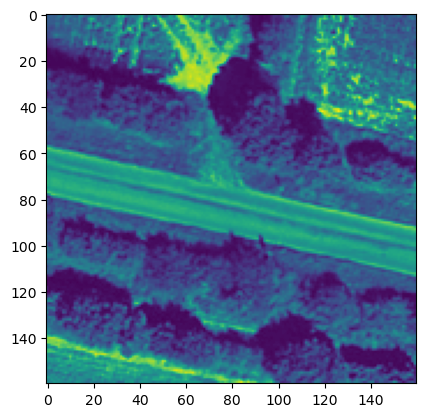

In [33]:
plt.imshow(all_data[1,:,:,1])

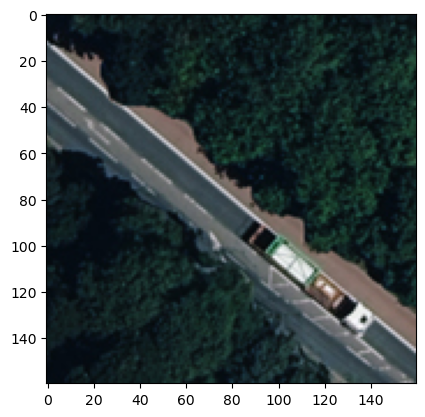

In [40]:
plt.imshow(all_data[4432])


In [46]:
# function to display images
def display(array1, array2, array3):
    """
    Displays 5 random images from each one of the supplied arrays.
    """

    n = 5

    indices = np.random.choice(len(array1), size=n, replace=False)
    images1 = array1[indices]
    images2 = array2[indices]
    images3 = array3[indices]

        
    plt.figure(figsize=(12, 12))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2, images3)):
        ax = plt.subplot(5, n, i + 1)
        plt.imshow(image1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(5, n, i + 1 + n)
        plt.imshow(image2)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(5, n, i + 1 + n + n)
        plt.imshow(image3)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

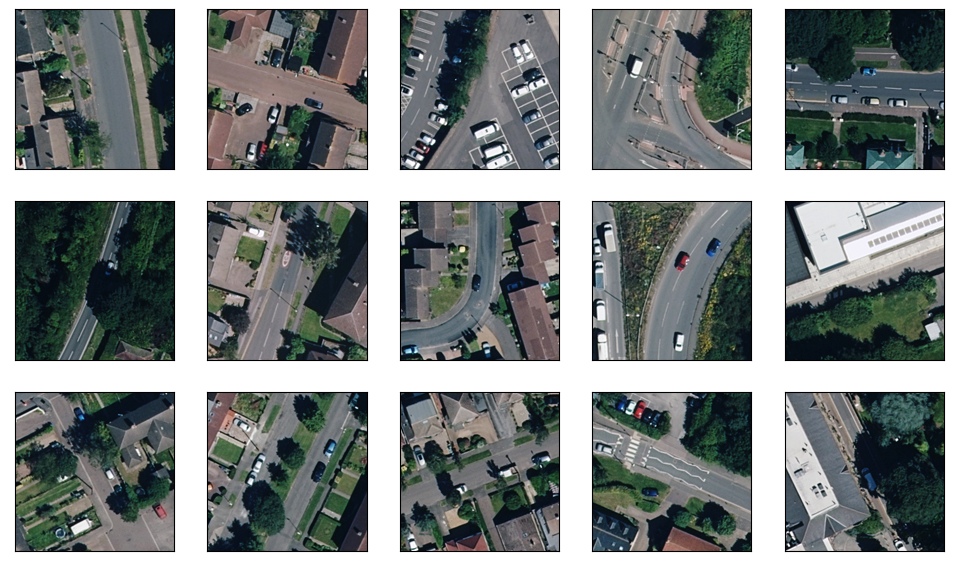

In [47]:
display(all_data,all_data,all_data)